# Pacotes

In [1]:
!pip install plotly.express

In [2]:
import pandas as pd
import glob
import os

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import plotly.express as px

# <font color='red'> 1)  Coleta dos dados</font>

### 1.1) Leitura dos arquivos

#### OBS: Escolhi utilizar os arquivos csv pela facilidade de leitura e poder utilizar chunks de dados

In [3]:
def get_csv_files(years: range = range(2000, 2021), directory: str = "../data") -> list: 
    dataframes_list = []

    for year in years:
        file_name = f"GERACAO_USINA_{year}.csv"
        file_path = os.path.join(directory, file_name)

        print(f"\nLendo o arquivo {file_name}...")

        if glob.glob(file_path):
            df = pd.read_csv(file_path, delimiter=";", encoding="utf-8", low_memory=False)

            df['din_instante'] = pd.to_datetime(df['din_instante'])

            dataframes_list.append(df)
        else:
            raise Exception(f"O arquivo {file_name} não foi encontrado.")
            

    return dataframes_list

In [4]:
try: 
    dataframes = get_csv_files(range(2000, 2021), "../data")
except Exception as e:
    print(f"Erro: {e}")


Lendo o arquivo GERACAO_USINA_2000.csv...

Lendo o arquivo GERACAO_USINA_2001.csv...

Lendo o arquivo GERACAO_USINA_2002.csv...

Lendo o arquivo GERACAO_USINA_2003.csv...

Lendo o arquivo GERACAO_USINA_2004.csv...

Lendo o arquivo GERACAO_USINA_2005.csv...

Lendo o arquivo GERACAO_USINA_2006.csv...

Lendo o arquivo GERACAO_USINA_2007.csv...

Lendo o arquivo GERACAO_USINA_2008.csv...

Lendo o arquivo GERACAO_USINA_2009.csv...

Lendo o arquivo GERACAO_USINA_2010.csv...

Lendo o arquivo GERACAO_USINA_2011.csv...

Lendo o arquivo GERACAO_USINA_2012.csv...

Lendo o arquivo GERACAO_USINA_2013.csv...

Lendo o arquivo GERACAO_USINA_2014.csv...

Lendo o arquivo GERACAO_USINA_2015.csv...

Lendo o arquivo GERACAO_USINA_2016.csv...

Lendo o arquivo GERACAO_USINA_2017.csv...

Lendo o arquivo GERACAO_USINA_2018.csv...

Lendo o arquivo GERACAO_USINA_2019.csv...

Lendo o arquivo GERACAO_USINA_2020.csv...


### 1.2) Observando dados crus

In [5]:
display(dataframes[0].head(10))

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao
0,2000-01-01,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,2422.5
1,2000-01-01,NE,NORDESTE,AL,ALAGOAS,TIPO I,HIDROELÉTRICA,Hidráulica,Xingó,UHE.PH.SE.027053-9.01,1995.6
2,2000-01-01,NE,NORDESTE,BA,BAHIA,Pequenas Usinas (Tipo III),HIDROELÉTRICA,Hidráulica,Pequenas Centrais Hidroelétricas da Chesf,-,13.0
3,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Apolônio Sales,UHE.PH.AL.001510-5.01,202.5
4,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso II,UHE.PH.BA.027048-2.01,269.8
5,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Sobradinho,UHE.PH.BA.002755-3.01,322.8
6,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso IV,UHE.PH.BA.027050-4.01,779.4
7,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso I,UHE.PH.BA.002012-5.01,119.4
8,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso III,UHE.PH.BA.027049-0.01,480.4
9,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,TÉRMICA,Gás,Camaçari,UTE.GN.BA.000602-5.01,0.0


In [6]:
dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993556 entries, 0 to 993555
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   din_instante            993556 non-null  datetime64[ns]
 1   id_subsistema           993556 non-null  object        
 2   nom_subsistema          993556 non-null  object        
 3   id_estado               993556 non-null  object        
 4   nom_estado              993556 non-null  object        
 5   cod_modalidadeoperacao  993556 non-null  object        
 6   nom_tipousina           993556 non-null  object        
 7   nom_tipocombustivel     993556 non-null  object        
 8   nom_usina               993556 non-null  object        
 9   ceg                     993556 non-null  object        
 10  val_geracao             993556 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 83.4+ MB


In [7]:
dataframes[0].shape

(993556, 11)

# <font color='red'> 2) Preparação inicial dos dados</font>

### 2.1) Seleção dos dados

#### 2.1.1) Selecionando apenas alguns atributos 

#### OBS: Agrupei os dados para a região sudeste e com foco na produção de energia por meio de hidrelétricas

In [8]:
def select_data(dataframes: list[pd.DataFrame], cols: list) -> list[pd.DataFrame]:
    output = []
    for df in dataframes: 
        df['din_instante'] = pd.to_datetime(df['din_instante'])

        subset = df[(df['id_subsistema'] == 'SE') & (df['nom_tipousina'] == 'HIDROELÉTRICA')].reset_index(drop=True)

        subset = subset[cols]

        output.append(subset)

    return output

In [9]:
cols = ["din_instante", "id_estado", "nom_tipousina", "val_geracao"]

select_data = select_data(dataframes, cols)

In [10]:
display(select_data[0].head(20))

,din_instante,id_estado,nom_tipousina,val_geracao
0,2000-01-01,DF,HIDROELÉTRICA,23.0
1,2000-01-01,ES,HIDROELÉTRICA,125.0
2,2000-01-01,ES,HIDROELÉTRICA,13.0
3,2000-01-01,GO,HIDROELÉTRICA,6.0
4,2000-01-01,GO,HIDROELÉTRICA,301.8
5,2000-01-01,GO,HIDROELÉTRICA,424.5
6,2000-01-01,GO,HIDROELÉTRICA,592.0
7,2000-01-01,I,HIDROELÉTRICA,3528.2
8,2000-01-01,MG,HIDROELÉTRICA,924.3
9,2000-01-01,MG,HIDROELÉTRICA,97.2


#### 2.1.2) Removendo estados que estão como sudeste (Mas não fazem parte do sudeste)

In [11]:
df = pd.concat(select_data)

valores_unicos = df['id_estado'].unique()

print(valores_unicos)

['DF' 'ES' 'GO' 'I' 'MG' 'MS' 'MT' 'PR' 'RJ' 'SP' 'TO' 'PA' 'RO']


In [12]:
def remove_states_from_sudeste(dataframes: list[pd.DataFrame]) -> list[pd.DataFrame]:
    output = []
    states = ['ES', 'MG', 'RJ', 'SP']
    for df in dataframes:
        subset = df[df['id_estado'].isin(states)].reset_index(drop=True)

        output.append(subset)

    return output

In [13]:
select_data = remove_states_from_sudeste(select_data)

display(select_data[0].head(20))

,din_instante,id_estado,nom_tipousina,val_geracao
0,2000-01-01,ES,HIDROELÉTRICA,125.0
1,2000-01-01,ES,HIDROELÉTRICA,13.0
2,2000-01-01,MG,HIDROELÉTRICA,924.3
3,2000-01-01,MG,HIDROELÉTRICA,97.2
4,2000-01-01,MG,HIDROELÉTRICA,23.4
5,2000-01-01,MG,HIDROELÉTRICA,29.3
6,2000-01-01,MG,HIDROELÉTRICA,244.5
7,2000-01-01,MG,HIDROELÉTRICA,120.0
8,2000-01-01,MG,HIDROELÉTRICA,75.0
9,2000-01-01,MG,HIDROELÉTRICA,139.6


In [14]:
select_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500631 entries, 0 to 500630
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   din_instante   500631 non-null  datetime64[ns]
 1   id_estado      500631 non-null  object        
 2   nom_tipousina  500631 non-null  object        
 3   val_geracao    500631 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.3+ MB


#### 2.1.3) Concatenando dataframes de select_data

In [15]:
select_data_concat = pd.concat(select_data)

select_data_concat.shape

(13294780, 4)

In [16]:
display(select_data_concat.tail(10))

,din_instante,id_estado,nom_tipousina,val_geracao
720278,2020-12-31 23:00:00,SP,HIDROELÉTRICA,23.828
720279,2020-12-31 23:00:00,SP,HIDROELÉTRICA,81.620
720280,2020-12-31 23:00:00,SP,HIDROELÉTRICA,21.420
720281,2020-12-31 23:00:00,SP,HIDROELÉTRICA,1.030
720282,2020-12-31 23:00:00,SP,HIDROELÉTRICA,9.000
720283,2020-12-31 23:00:00,SP,HIDROELÉTRICA,846.201
720284,2020-12-31 23:00:00,SP,HIDROELÉTRICA,86.978
720285,2020-12-31 23:00:00,SP,HIDROELÉTRICA,19.230
720286,2020-12-31 23:00:00,SP,HIDROELÉTRICA,101.739
720287,2020-12-31 23:00:00,SP,HIDROELÉTRICA,16.471


#### 2.1.4) Agrupando por datas (mês e ano)

In [19]:
def groupby_month(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    # Criar coluna 'ano-mes' baseada na coluna 'din_instante'
    df['ano-mes'] = df['din_instante'].dt.to_period('M')
    
    # Agrupar por 'ano-mes' e 'estado', somando 'val_geracao'
    df_agrupado = df.groupby(['ano-mes'])['val_geracao'].sum().reset_index()
    
    return df_agrupado


In [20]:
def groupby_month_and_state(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    # Criar coluna 'ano-mes' baseada na coluna 'din_instante'
    df['ano-mes'] = df['din_instante'].dt.to_period('M')
    
    # Agrupar por 'ano-mes' e 'estado', somando 'val_geracao'
    df_agrupado = df.groupby(['ano-mes', 'id_estado'])['val_geracao'].sum().reset_index()
    
    return df_agrupado

In [21]:
def groupby_year(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    # Criar coluna 'ano-mes' baseada na coluna 'din_instante'
    df['ano'] = df['din_instante'].dt.to_period('Y')
    
    # Agrupar por 'ano-mes' e 'estado', somando 'val_geracao'
    df_agrupado = df.groupby(['ano'])['val_geracao'].sum().reset_index()
    
    return df_agrupado

In [22]:
def groupby_year_and_state(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    df['ano'] = df['din_instante'].dt.to_period('Y')
    
    df_agrupado = df.groupby(['ano', "id_estado"])['val_geracao'].sum().reset_index()
    
    return df_agrupado

In [25]:
# Agrupar por mês
data_groupby_month = groupby_month(select_data_concat)
display(data_groupby_month.head(10))

,ano-mes,val_geracao
0,2000-01,1.071918e+07
1,2000-02,1.035681e+07
2,2000-03,1.080006e+07
3,2000-04,1.068840e+07
4,2000-05,1.153444e+07
5,2000-06,1.115205e+07
6,2000-07,1.083703e+07
7,2000-08,1.071398e+07
8,2000-09,9.167134e+06
9,2000-10,1.028457e+07


In [26]:
# Agrupar por mês e estado
data_groupby_month_and_state = groupby_month_and_state(select_data_concat)
display(data_groupby_month_and_state.head(10))

,ano-mes,id_estado,val_geracao
0,2000-01,ES,1.630222e+05
1,2000-01,MG,4.790032e+06
2,2000-01,RJ,6.133784e+05
3,2000-01,SP,5.152747e+06
4,2000-02,ES,1.633566e+05
5,2000-02,MG,4.760096e+06
6,2000-02,RJ,5.918736e+05
7,2000-02,SP,4.841480e+06
8,2000-03,ES,1.830955e+05
9,2000-03,MG,4.619601e+06


In [27]:
# Agrupar por ano
data_groupby_year = groupby_year(select_data_concat)
display(data_groupby_year.head(10))

,ano,val_geracao
0,2000,1.241543e+08
1,2001,8.782763e+07
2,2002,1.063059e+08
3,2003,1.240454e+08
4,2004,1.252314e+08
5,2005,1.375034e+08
6,2006,1.474132e+08
7,2007,1.467880e+08
8,2008,1.443459e+08
9,2009,1.544492e+08


In [28]:
# Agrupar por ano e estado
data_groupby_year_and_state = groupby_year_and_state(select_data_concat)
display(data_groupby_year_and_state.head(10))

,ano,id_estado,val_geracao
0,2000,ES,1.543397e+06
1,2000,MG,5.628826e+07
2,2000,RJ,6.170750e+06
3,2000,SP,6.015191e+07
4,2001,ES,9.293457e+05
5,2001,MG,3.186646e+07
6,2001,RJ,5.757143e+06
7,2001,SP,4.927468e+07
8,2002,ES,1.450155e+06
9,2002,MG,3.937028e+07


## 2.A) Análise dos dados

### 2.A.1) Energia total ao longo dos meses

In [29]:
def plot_data_groupby_month(data_groupby_month: pd.DataFrame):
    # Configurar o tamanho do gráfico
    plt.figure(figsize=(12, 6))

    # Extrair dados do DataFrame
    anos_meses = data_groupby_month['ano-mes'].astype(str) 
    val_geracao = data_groupby_month['val_geracao'] / 1e6 


    plt.plot(anos_meses, val_geracao, linestyle='-', color='b')

    plt.title('Produção de energia Hidrelétrica ao longo dos meses')
    plt.xlabel('Ano-Mês (6 em 6 meses)')
    plt.ylabel('Valor de Geração (em milhões MWmed)')

    plt.xticks(rotation=45, ha='right')

    plt.xticks(anos_meses[::6])
    
    plt.tight_layout()
    plt.grid(True)
    plt.show()

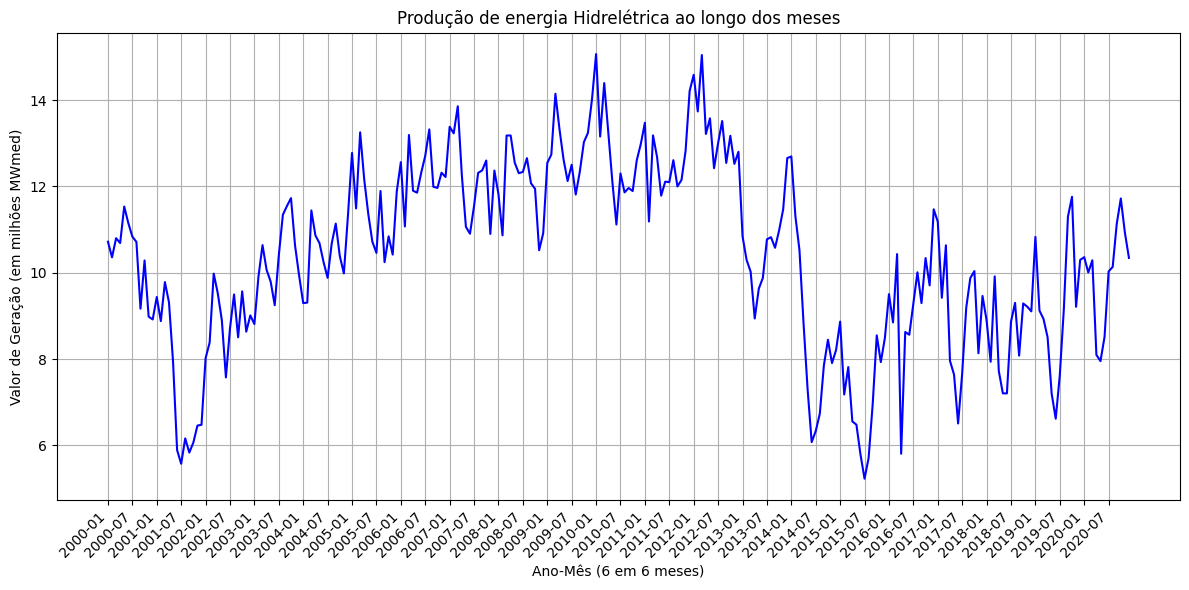

In [30]:
plot_data_groupby_month(data_groupby_month)

In [31]:
data_groupby_month['val_geracao'].describe().T

count    2.520000e+02
mean     1.042974e+07
std      2.119932e+06
min      5.227589e+06
25%      8.937705e+06
50%      1.063130e+07
75%      1.211516e+07
max      1.506583e+07
Name: val_geracao, dtype: float64

### 2.A.2) Energia total ao longo dos meses (para cada estado)

In [32]:
def plot_data_groupby_month_and_state(data_groupby_month_state: pd.DataFrame, state_name: str):

    plt.figure(figsize=(10, 6))

    anos_meses = data_groupby_month_state['ano-mes'].astype(str) 
    val_geracao = data_groupby_month_state['val_geracao'] / 1e6  

    plt.plot(anos_meses, val_geracao, linestyle='-', color='b')
    plt.title(f'Produção de energia hidrelétrica no {state_name} ao longo dos meses')
    plt.xlabel('Ano-Mês (6 em 6 meses)')
    plt.ylabel('Valor de Geração (em milhões MWmed)')
    plt.xticks(rotation=45) 

    plt.xticks(anos_meses[::6])

    plt.tight_layout()
    plt.grid(True)
    plt.show()

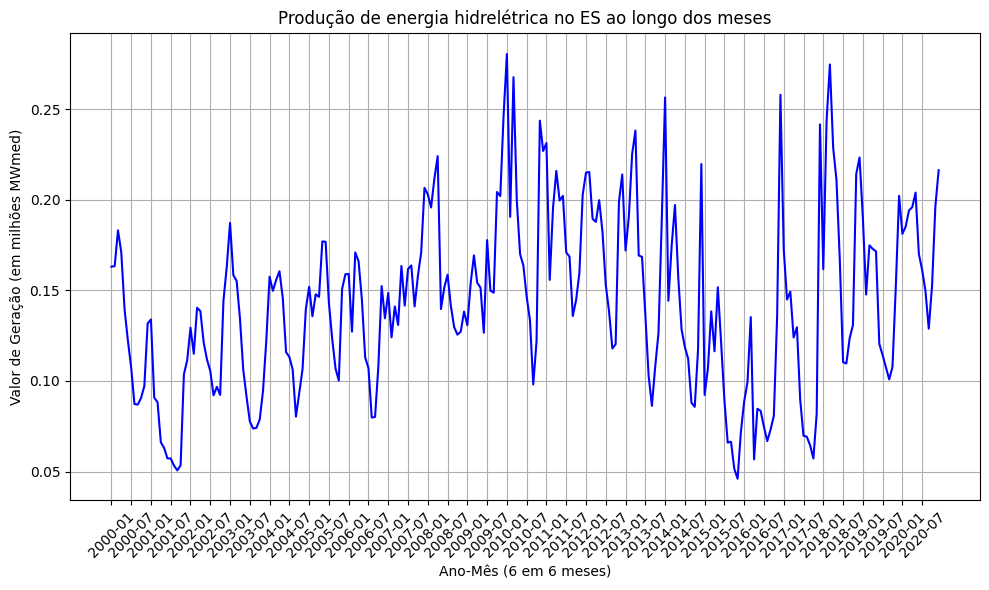

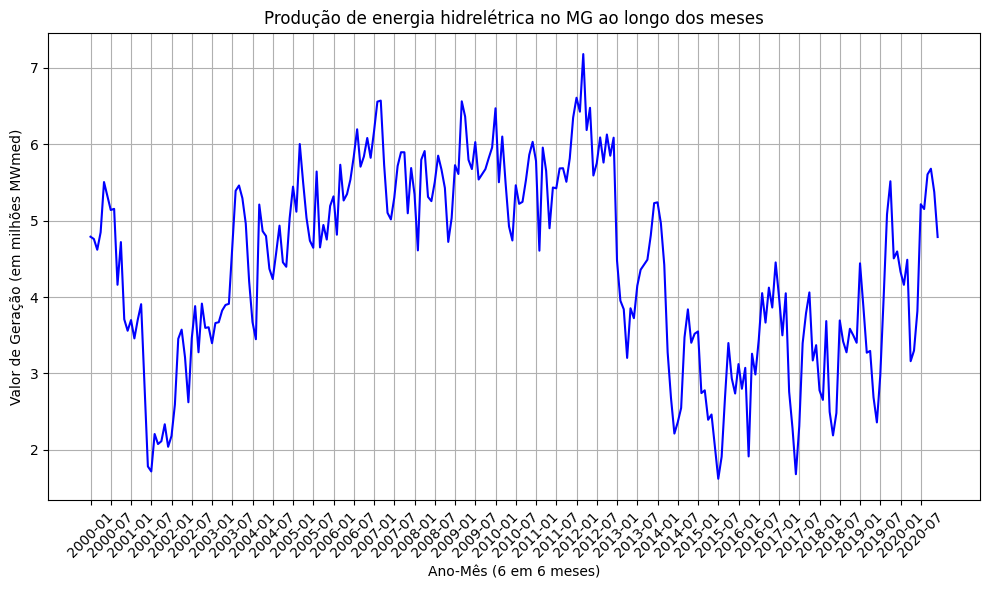

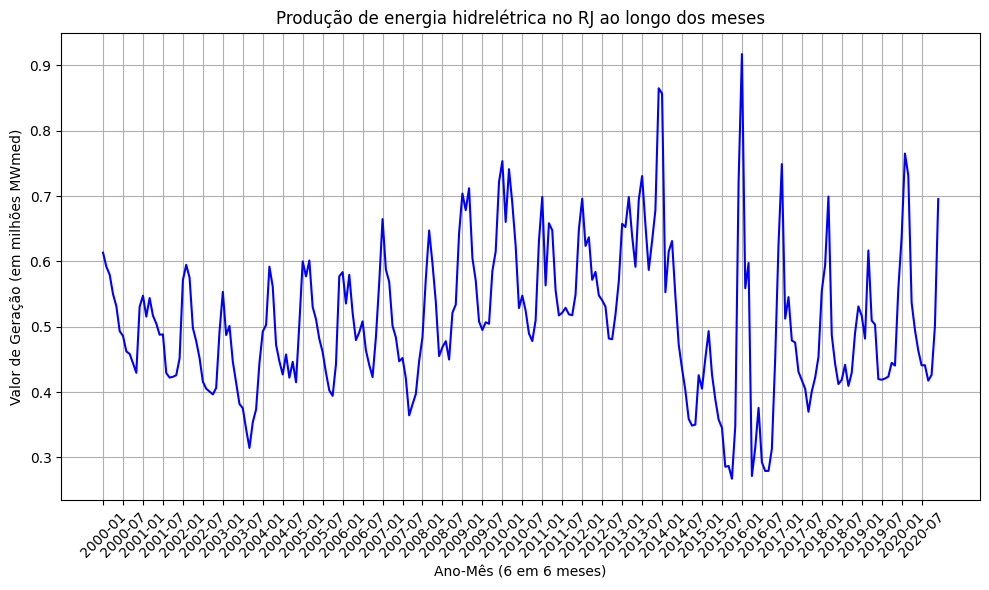

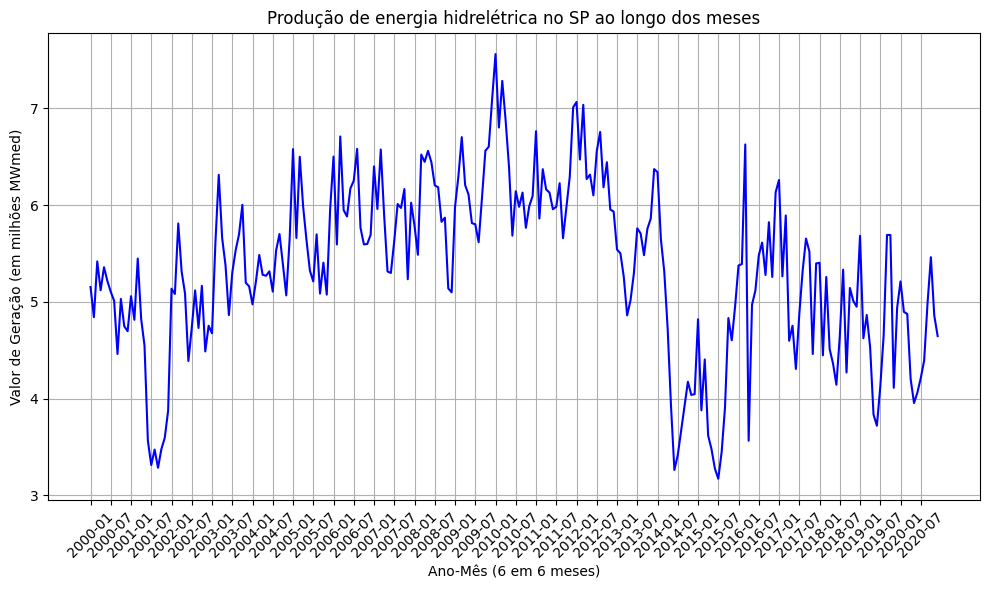

In [33]:
for state_name, state_data in data_groupby_month_and_state.groupby('id_estado'):
    plot_data_groupby_month_and_state(state_data, state_name)

In [34]:
data_groupby_month_and_state['val_geracao'].describe().T

count    1.008000e+03
mean     2.607435e+06
std      2.434385e+06
min      4.605514e+04
25%      2.738191e+05
50%      1.269394e+06
75%      5.136382e+06
max      7.560476e+06
Name: val_geracao, dtype: float64

### 2.A.3) Energia total ao longo dos anos

In [35]:
def plot_data_groupby_year(data_groupby_year: pd.DataFrame):
    plt.figure(figsize=(12, 6))

    anos = data_groupby_year['ano'].astype(str) 
    val_geracao = data_groupby_year['val_geracao'] / 1e6  

    bars = plt.bar(anos, val_geracao, color='b')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    plt.title('Produção de energia Hidrelétrica ao longo dos anos')
    plt.xlabel('Ano')
    plt.ylabel('Valor de Geração (em milhões MWmed)')

    plt.tight_layout()
    plt.show()

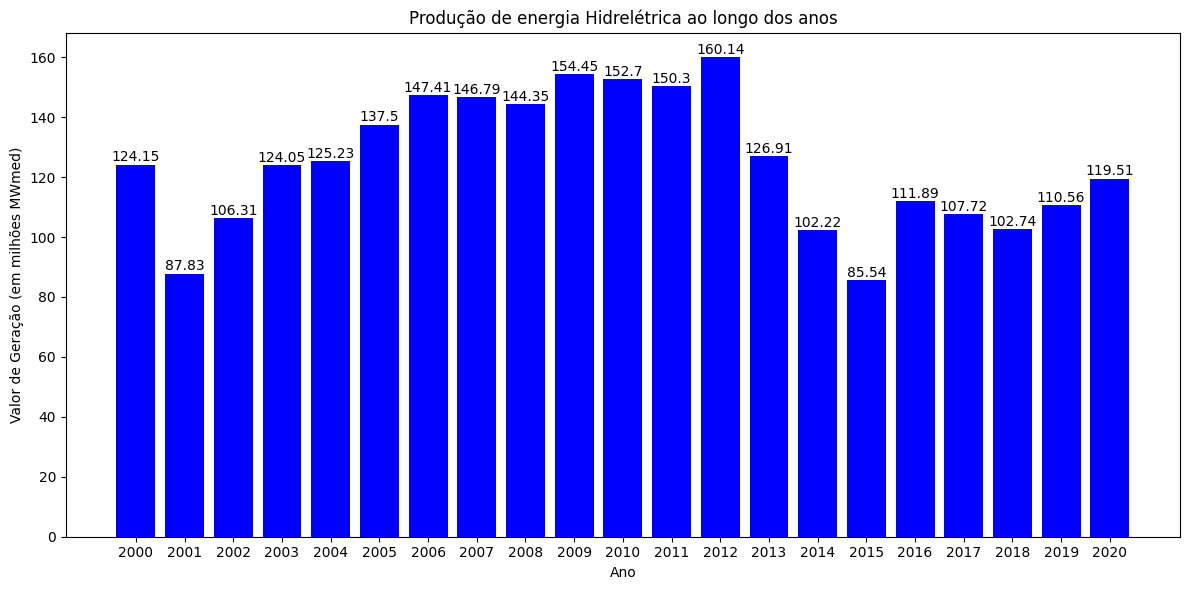

In [36]:
plot_data_groupby_year(data_groupby_year)

In [37]:
data_groupby_year['val_geracao'].describe().T

count    2.100000e+01
mean     1.251569e+08
std      2.239745e+07
min      8.554460e+07
25%      1.077172e+08
50%      1.241543e+08
75%      1.467880e+08
max      1.601375e+08
Name: val_geracao, dtype: float64

### 2.A.4) Energia total ao longo dos anos para cada estado

In [38]:
def plot_data_groupby_year_and_state(data_groupby_year_state: pd.DataFrame, state_name: str):

    plt.figure(figsize=(10, 6))

    anos = data_groupby_year_state['ano'].astype(str) 
    val_geracao = data_groupby_year_state['val_geracao'] / 1e6 

    bars = plt.bar(anos, val_geracao, color='b')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    plt.title(f'Produção de energia Hidrelétrica {state_name} ao longo dos anos')
    plt.xlabel('Ano')
    plt.ylabel('Valor de Geração (em milhões MWmed)')
    
    plt.tight_layout()
    plt.show()

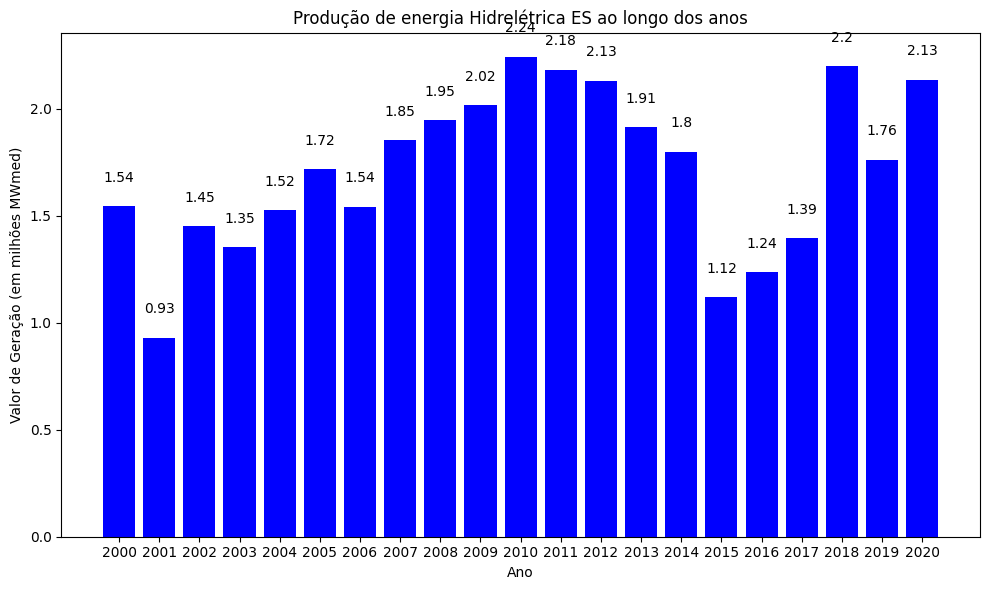

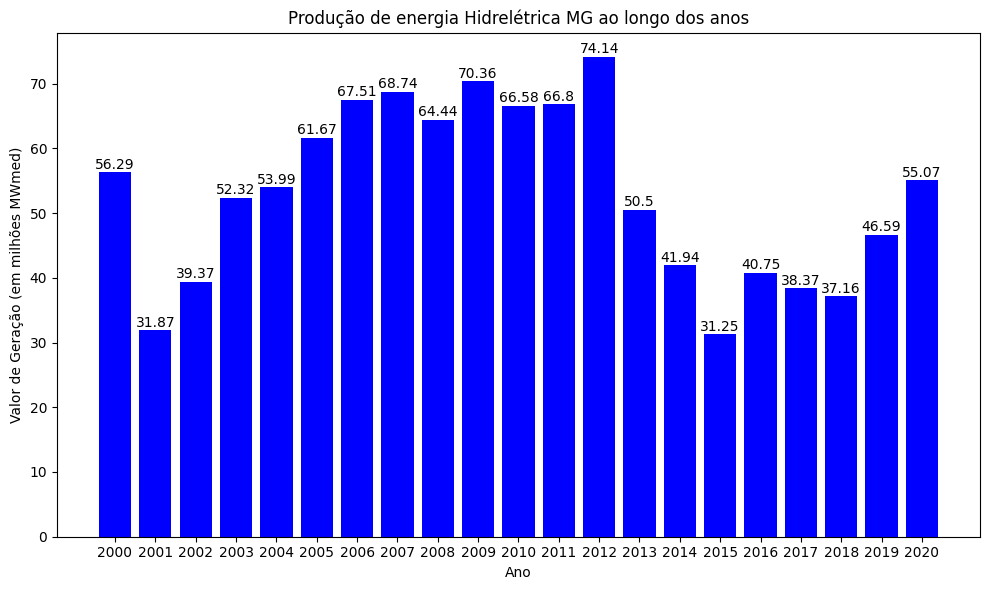

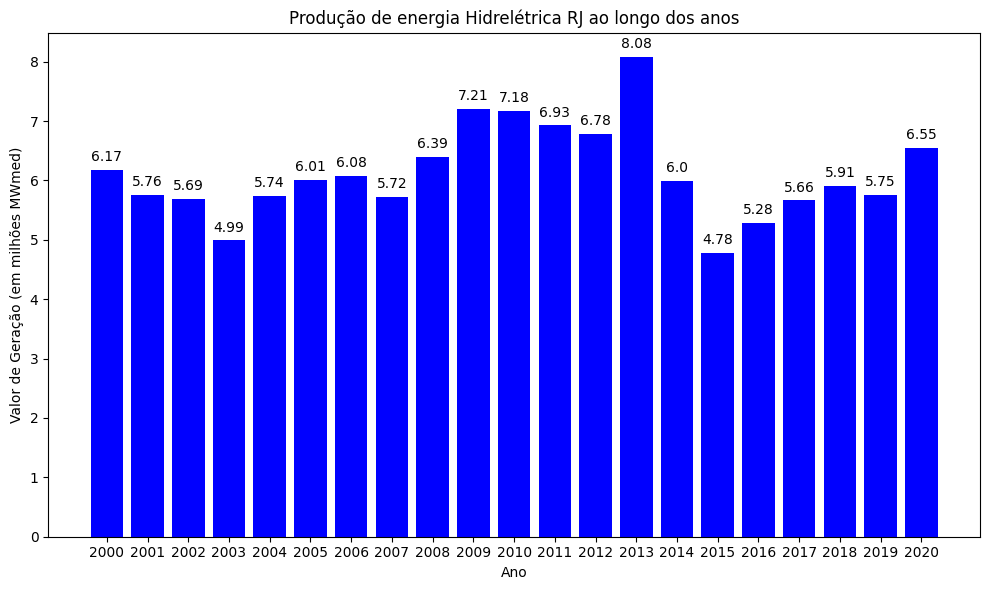

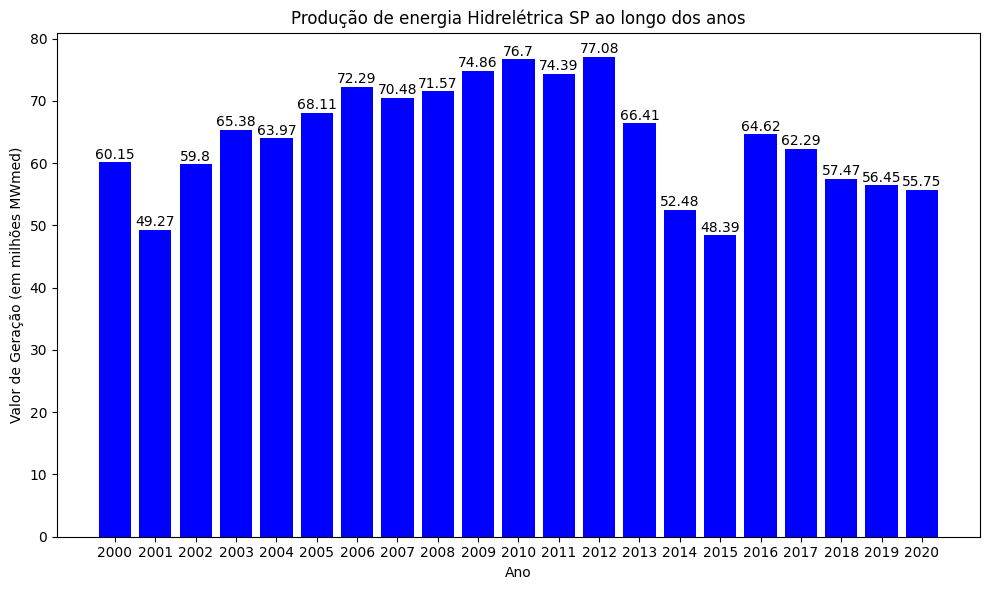

In [39]:
for state_name, state_data in data_groupby_year_and_state.groupby('id_estado'):
    plot_data_groupby_year_and_state(state_data, state_name)

In [40]:
data_groupby_year_and_state['val_geracao'].describe().T

count    8.400000e+01
mean     3.128922e+07
std      2.897128e+07
min      9.293457e+05
25%      4.144422e+06
50%      1.966819e+07
75%      6.053137e+07
max      7.708090e+07
Name: val_geracao, dtype: float64

### 2.2) Limpeza dos dados 

#### 2.2.1) Identificando e Corrigindo de dados ausentes (se houver)

In [41]:
def plot_missing_data(select_data_concat: pd.DataFrame) -> None:

    # Verifica a quantidade de dados ausentes para a coluna 'val_geracao'
    plt.figure(figsize=(8, 6))
    msno.matrix(select_data_concat[['val_geracao']])
    plt.title('Matriz de Dados Ausentes para a Coluna "val_geracao"')
    plt.show()

    print(select_data_concat.isna().sum())

In [42]:
def missing_data_correction(dataframes: list[pd.DataFrame]) -> pd.DataFrame:
    
    output = []
    for df in dataframes:
        # Verificar se há dados ausentes
        if df['val_geracao'].isnull().any():
            # Substituir valores ausentes pela média
            media_val_geracao = df['val_geracao'].mean()
            df['val_geracao'].fillna(media_val_geracao, inplace=True)

        output.append(df)

    return pd.concat(output)

<Figure size 800x600 with 0 Axes>

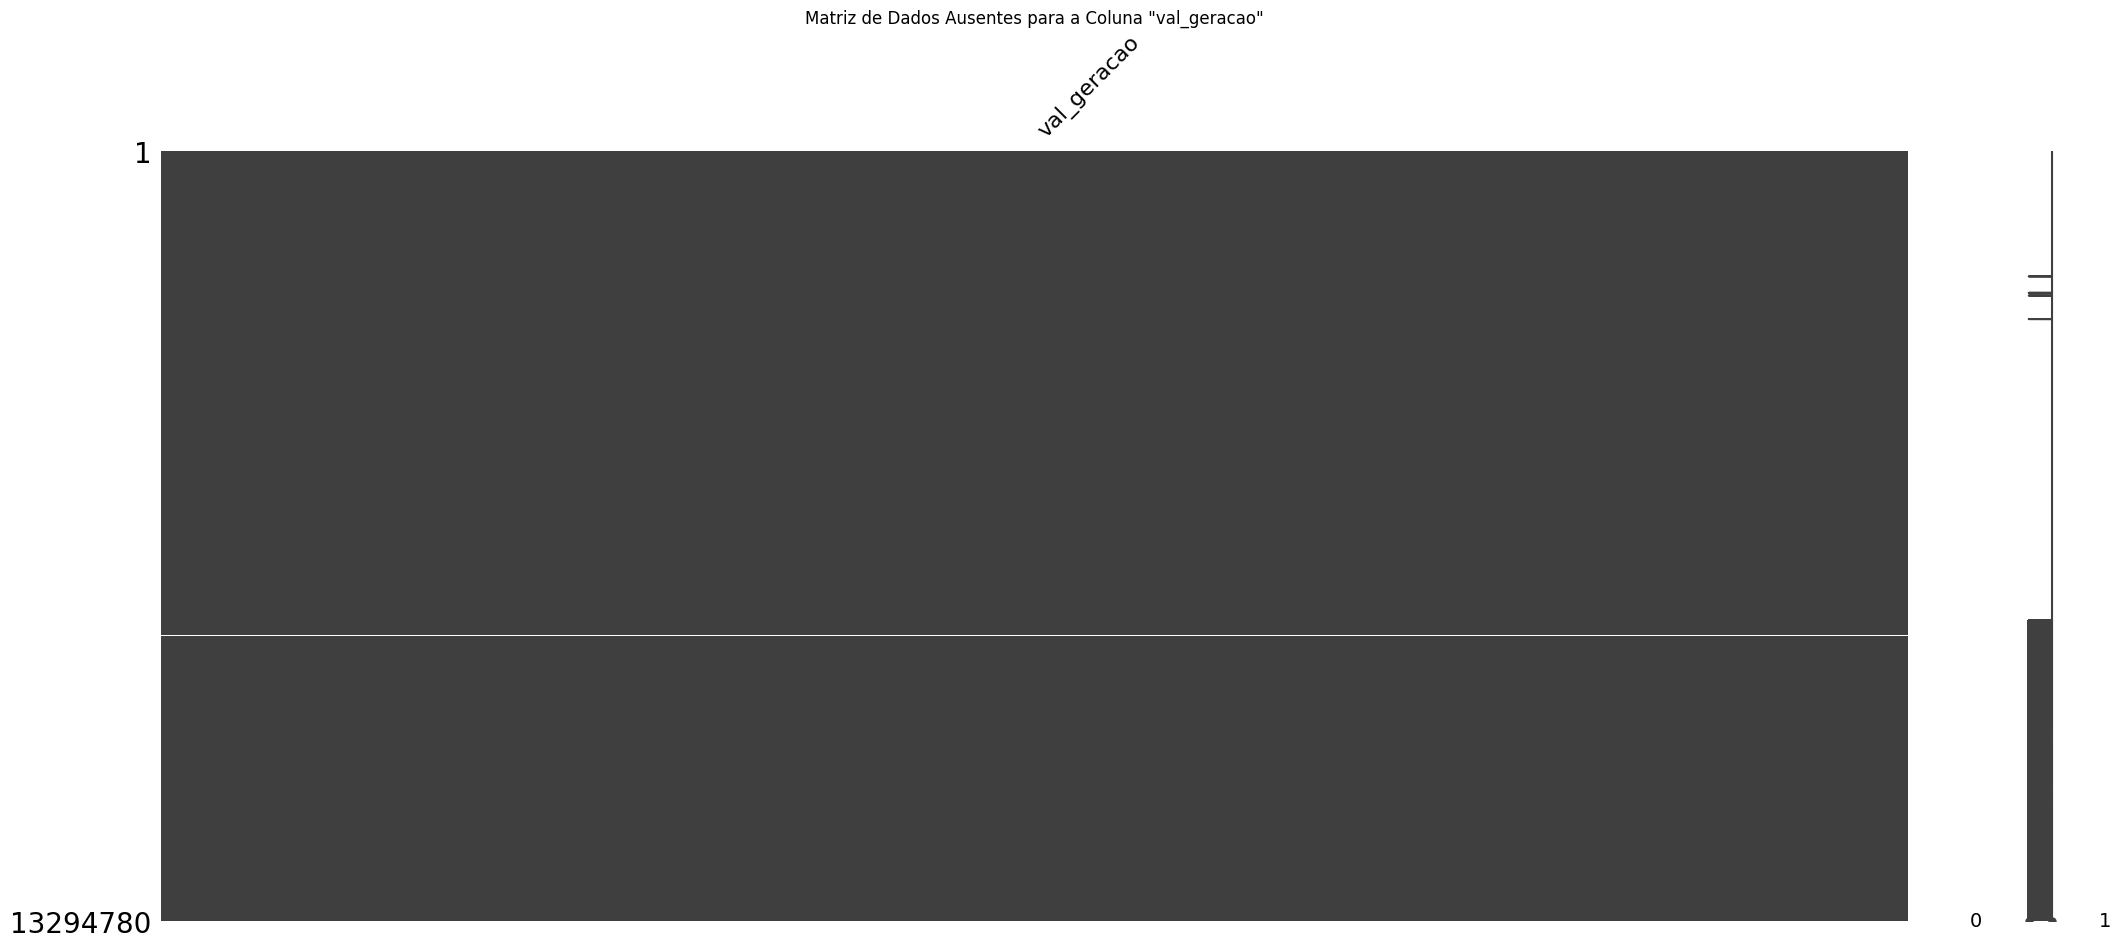

din_instante         0
id_estado            0
nom_tipousina        0
val_geracao      84136
ano-mes              0
ano                  0
dtype: int64


In [43]:
plot_missing_data(select_data_concat)

In [44]:
clean_data_concat = missing_data_correction(select_data)

In [45]:
display(clean_data_concat.head(10))

,din_instante,id_estado,nom_tipousina,val_geracao
0,2000-01-01,ES,HIDROELÉTRICA,125.0
1,2000-01-01,ES,HIDROELÉTRICA,13.0
2,2000-01-01,MG,HIDROELÉTRICA,924.3
3,2000-01-01,MG,HIDROELÉTRICA,97.2
4,2000-01-01,MG,HIDROELÉTRICA,23.4
5,2000-01-01,MG,HIDROELÉTRICA,29.3
6,2000-01-01,MG,HIDROELÉTRICA,244.5
7,2000-01-01,MG,HIDROELÉTRICA,120.0
8,2000-01-01,MG,HIDROELÉTRICA,75.0
9,2000-01-01,MG,HIDROELÉTRICA,139.6


<Figure size 800x600 with 0 Axes>

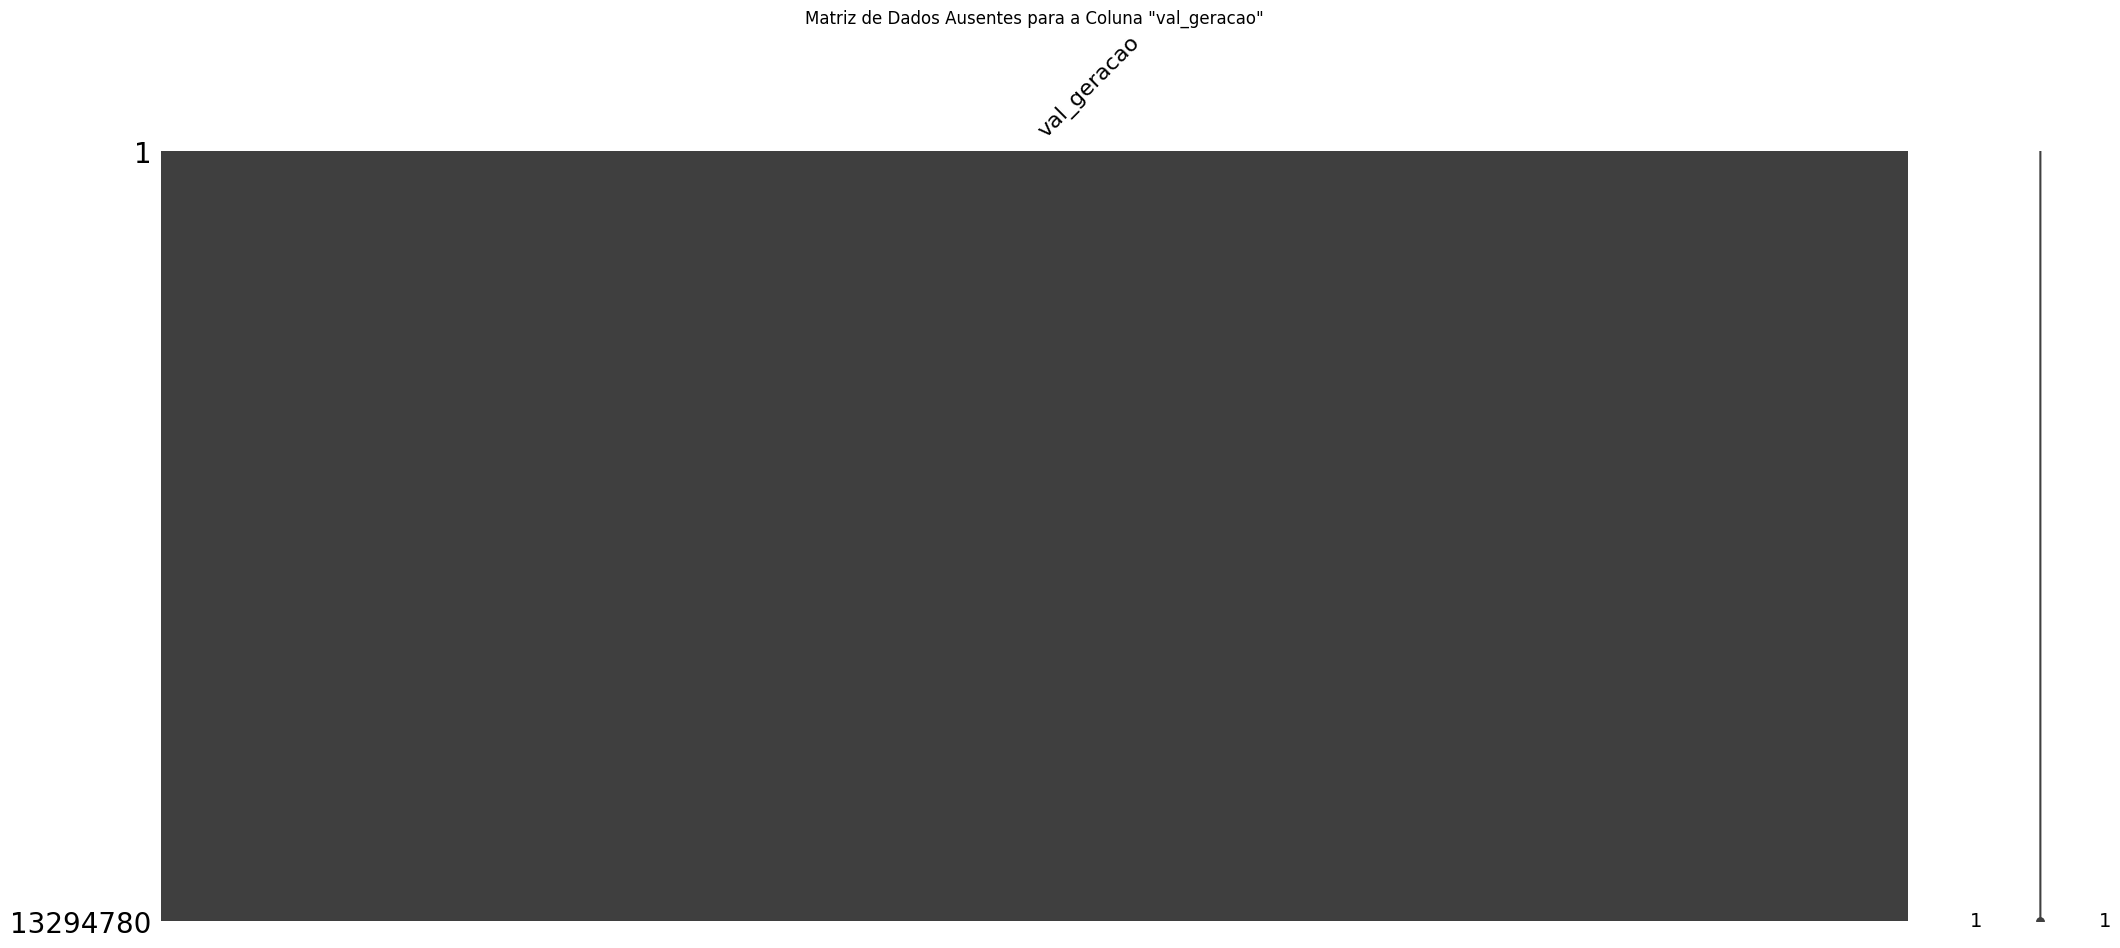

din_instante     0
id_estado        0
nom_tipousina    0
val_geracao      0
dtype: int64


In [46]:
plot_missing_data(clean_data_concat)

In [47]:
clean_data_month = groupby_month(clean_data_concat)

display(clean_data_month.head(10))

,ano-mes,val_geracao
0,2000-01,1.071918e+07
1,2000-02,1.035681e+07
2,2000-03,1.080006e+07
3,2000-04,1.068840e+07
4,2000-05,1.153444e+07
5,2000-06,1.115205e+07
6,2000-07,1.083703e+07
7,2000-08,1.071398e+07
8,2000-09,9.167134e+06
9,2000-10,1.028457e+07


#### 2.2.2) Identificando e Corrigindo de dados outliers (se houver)

In [48]:
def plot_outliers_data(data_groupby_month: pd.DataFrame) -> None:
    sns.boxplot(x='val_geracao', data=data_groupby_month)
    plt.show()

    data_groupby_month["val_geracao"].hist()

In [49]:
def outliers_correction(data_groupby_month: pd.DataFrame) -> pd.DataFrame:
    df = data_groupby_month
    
    Q1 = df['val_geracao'].quantile(0.25)
    Q3 = df['val_geracao'].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 - (whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df['val_geracao'] = np.where(df['val_geracao'] > upper_whisker,upper_whisker, np.where(df['val_geracao'] < lower_whisker,lower_whisker,df['val_geracao']))

    return df

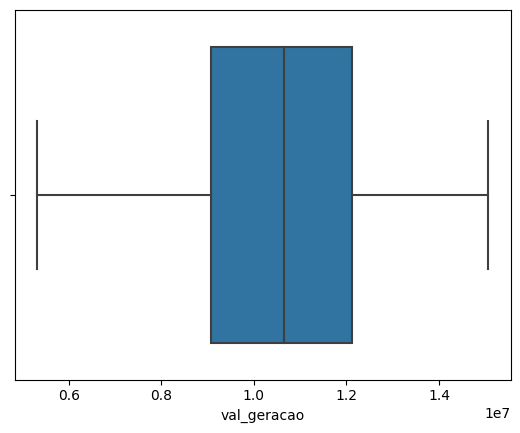

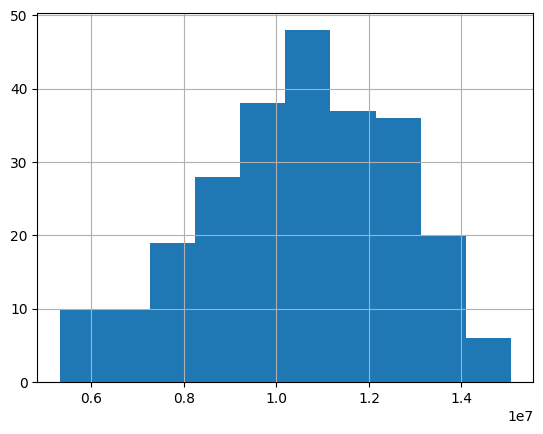

In [50]:
plot_outliers_data(clean_data_month)

In [51]:
output_data = outliers_correction(clean_data_month)

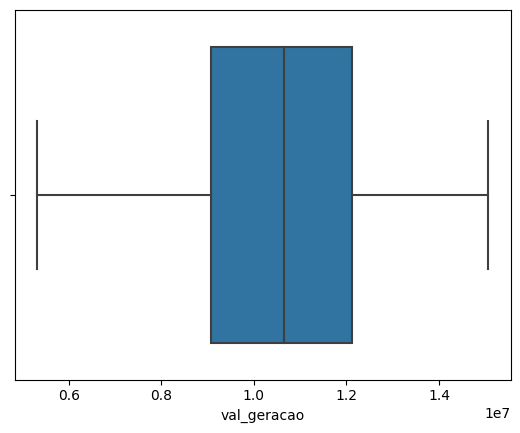

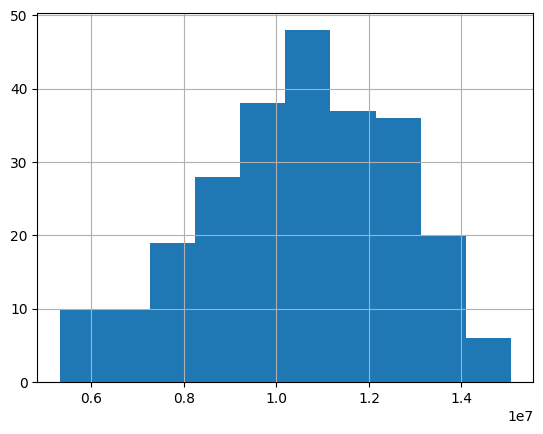

In [52]:
plot_outliers_data(output_data)

# <font color='red'> 3) Análise estátistica</font>

#### 3.1) Produção energetica ao longo dos meses

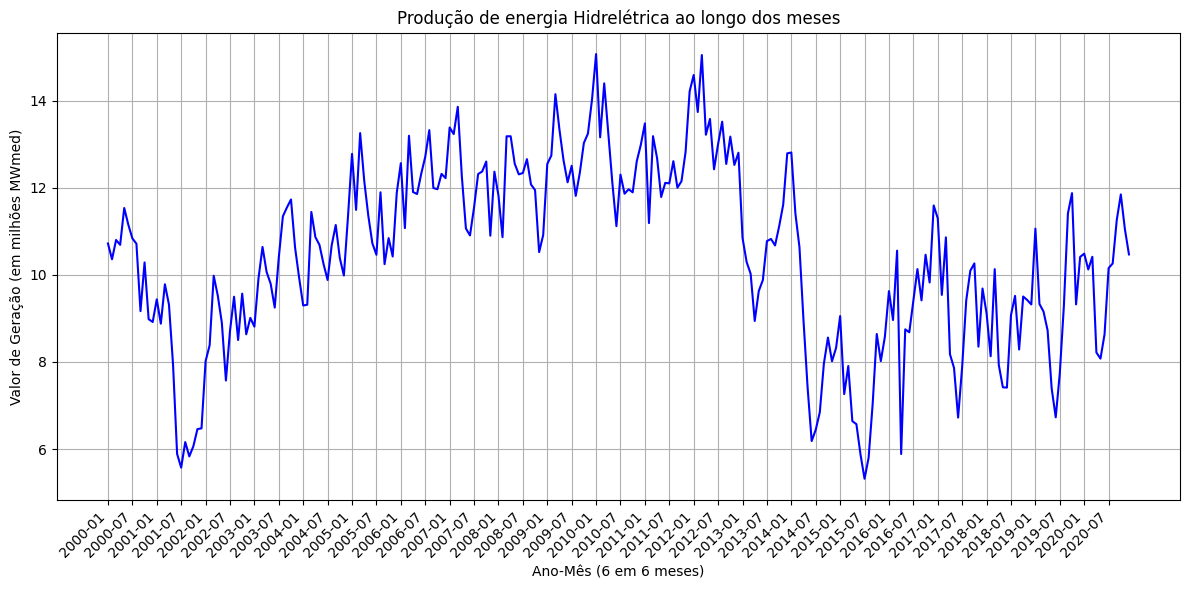

In [53]:
plot_data_groupby_month(output_data)

# <font color='red'> 4) Modelo de predição</font>

In [202]:
import keras
import tensorflow as tf

from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import Dropout 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [203]:
tf.random.set_seed(7)

### 4.1) Pré-processamento dos dados

In [204]:
df = output_data['val_geracao'].values 

In [205]:
df = df.reshape(-1,1)
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(df)
np.max(df)

0.9999999999999999

### 4.2) Divisão dos dados

In [206]:
train_size = int(len(df) * 0.9) # % 90 Train
test_size = len(df) - train_size # % 10 Test
print("Train Size :",train_size,"Test Size :",test_size)

train = df[0:train_size,:]
test = df[train_size:len(df),:]

Train Size : 226 Test Size : 26


### 4.3) Preparando séries temporais

In [223]:
def prepare_data(data, time_stemp):
    data_X, data_y = [], []
    for i in range(len(data) - time_stemp - 1):
        data_X.append(data[i:(i + time_stemp), 0])
        data_y.append(data[i + time_stemp, 0])
    
    data_X, data_y = np.array(data_X), np.array(data_y)

    data_X = np.reshape(data_X, (data_X.shape[0], time_stemp, data_X.shape[1]))
    return data_X, data_y

In [224]:
time_stemp = 1

train_X, train_y = prepare_data(train, time_stemp)
test_X, test_y = prepare_data(test, time_stemp)

print(train_X.shape)
print(test_X.shape)

(224, 1, 1)
(24, 1, 1)


### 4.4) Arquitetando rede neural recorrent (LSTM)

In [209]:
def create_lstm_model(time_stemp: int):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(1, time_stemp)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [210]:
model = create_lstm_model(time_stemp)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 50)             10400     
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_24 (Dense)            (None, 64)                3264      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                

In [211]:
epochs = 200

history = model.fit(train_X, train_y, epochs = epochs, batch_size = 50, verbose=1)

Epoch 1/200


5/5 [==============================] - 2s 3ms/step - loss: 0.3184
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2662
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2056
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1387
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0369
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 13/200
5/5 [==============================] - 0s 2ms/step - loss: 0

In [212]:
epoch = np.arange(0, epochs, 10)
losses = []
for i in epoch:
    if i % 10 == 0:
        losses.append(history.history["loss"][i])
        
data = {"epoch":epoch,"loss":losses}
data = pd.DataFrame(data) 

fig = px.line(data,x="epoch",y="loss",width = 1200, height = 500)
fig.show()

# <font color='red'> 5) Avaliação do modelo</font>

### 5.1) Predição dos dados de treino e teste

In [213]:
def data_prediction(model, train_X, test_X, train_y, test_y):
    train_predict = model.predict(train_X)
    test_predict = model.predict(test_X)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    train_y = scaler.inverse_transform([train_y])
    test_y = scaler.inverse_transform([test_y])

    return train_predict, test_predict, train_y, test_y

In [214]:
train_predict, test_predict, train_y, test_y = data_prediction(model, train_X, test_X, train_y, test_y)

1/1 [==============================] - 0s 417ms/step


### 5.2) Erro Percentual Absoluto Médio

In [215]:
def avaliando_modelo(train_y, test_y, train_predict, test_predict):

    trainScore = (keras.losses.mean_absolute_percentage_error(train_y[0], train_predict[:,0]))
    print('Train Score: %.2f MAPE' % (trainScore))
    testScore = (keras.losses.mean_absolute_percentage_error(test_y[0], test_predict[:,0]))
    print('Test Score: %.2f MAPE' % (testScore))

In [216]:
avaliando_modelo(train_y, test_y, train_predict, test_predict)

Train Score: 8.19 MAPE
Test Score: 9.80 MAPE


### 5.3) Plotando gráfico de predição 

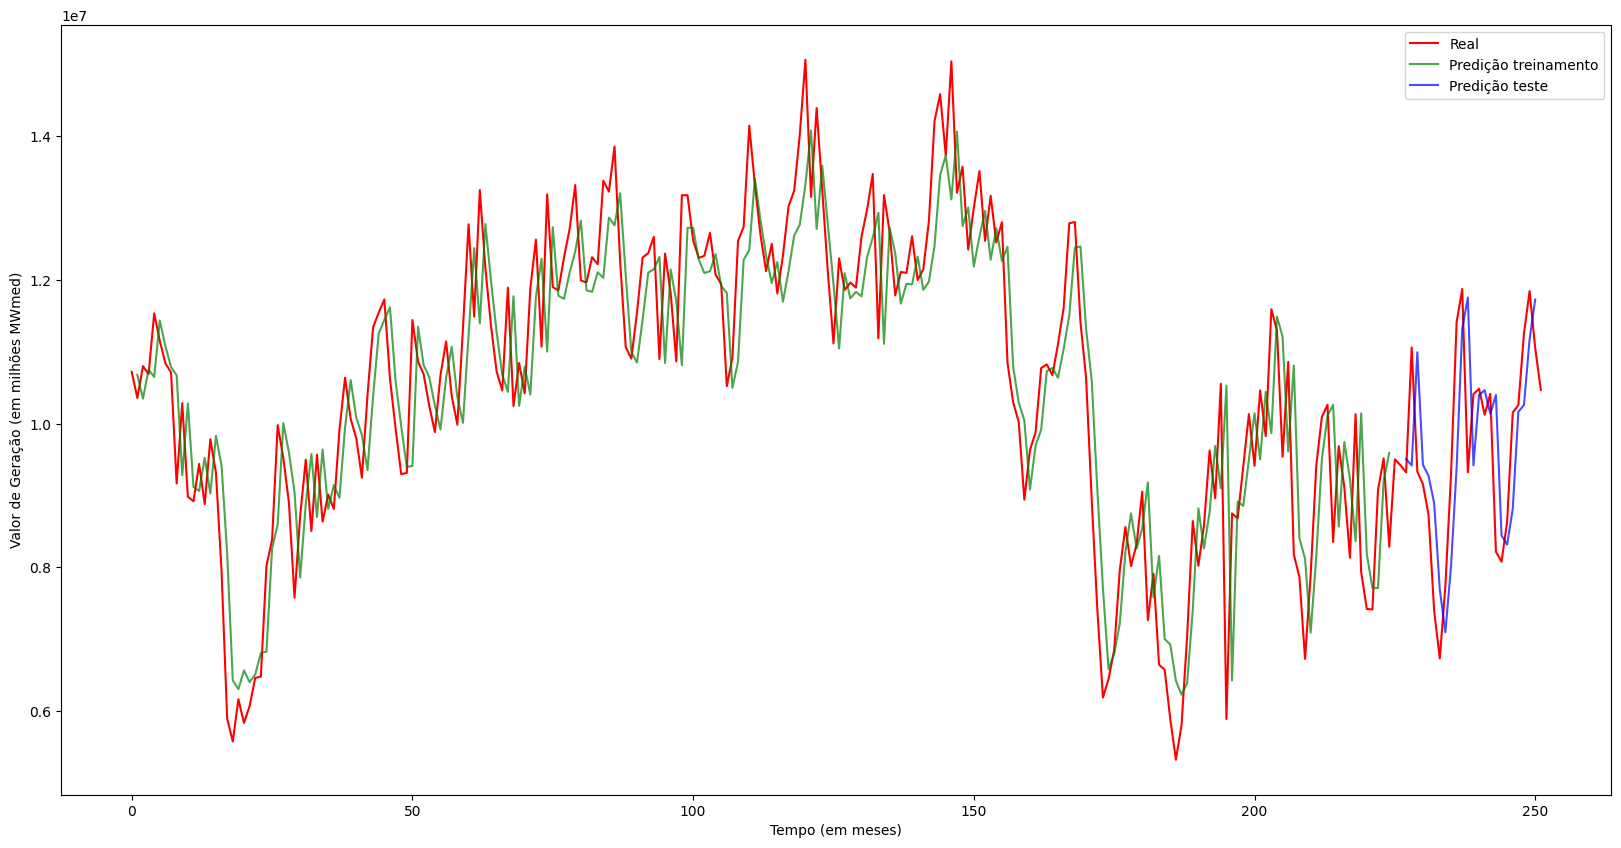

In [217]:
train_predict_plot = np.empty_like(df)
train_predict_plot[:,:] = np.nan
train_predict_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict

test_predict_plot = np.empty_like(df)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_stemp * 2) + 1:len(df) - 1, :] = test_predict

plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df),color = "red",label = "Real")
plt.plot(train_predict_plot,label = "Predição treinamento",color = "green", alpha = 0.7)
plt.plot(test_predict_plot,label = "Predição teste",color = "blue", alpha = 0.7)
plt.legend()
plt.xlabel("Tempo (em meses)")
plt.ylabel("Valor de Geração (em milhões MWmed)")
plt.show()

### 5.4) Comparando os resultados com os reais